In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.datasets import make_circles, make_moons

In [2]:
x = np.random.uniform(-1, 1, (1,50))
x = x.reshape(-1,1)
y = np.abs(x)
# x, y = load_planar_dataset() # make_moons(n_samples=200, noise=0.1)
# y = y.reshape(-1,1)
x.shape, y.shape

((50, 1), (50, 1))

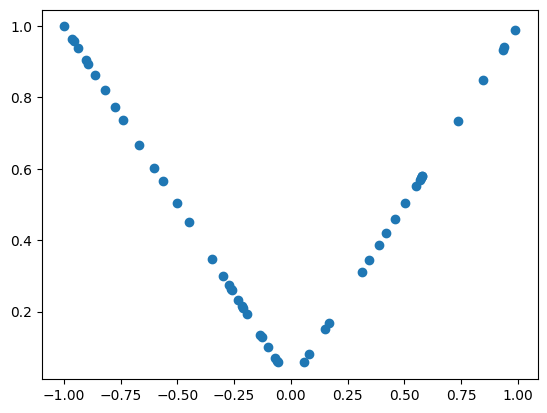

In [3]:
#plt.scatter(x[:,0], x[:,1], c=y)
plt.scatter(x,y)

In [4]:
class Loss():
  def __init__(self):
    self.x_in = None
    self.y_in = None

  def forward(self, x_in, y_in):
    self.x_in = x_in
    self.y_in = y_in
    return np.sum((self.x_in-self.y_in)**2)/len(self.x_in)

  def backward(self):
    return 2*(self.x_in-self.y_in)/len(self.x_in)

In [5]:
class Activation():
  def __init__(self):
    self.x_in = None

  def forward(self, x_in):
    self.x_in = x_in
    return 1/(1+np.exp(-self.x_in))

  def backward(self, grad, lr=1e-3):
    return grad* np.exp(-self.x_in)/(1+np.exp(-self.x_in))**2

In [6]:
class Linear():
  def __init__(self, input_size, output_size):
    self.W = np.random.random((output_size, input_size))*0.01
    self.b = np.random.random((output_size, 1))*0.01

    self.grad_W = np.zeros(self.W.shape)
    self.grad_b = np.zeros(self.b.shape)

    self.x_in = None

  def forward(self, x_in):
    self.x_in = x_in
    return (self.W.dot(self.x_in.T) + self.b).T

  def backward(self, grad, lr=1e-3):
    self.grad_W = grad.T @ self.x_in
    self.grad_b = grad.T @ np.ones((len(self.x_in),1))
    grad = grad @ self.W
    self.W -= lr * self.grad_W
    self.b -= lr * self.grad_b
    #grad = grad @ self.W
    return grad

In [7]:
model = [Linear(1,3), Activation(), Linear(3,1)]
loss = Loss()

In [32]:
loss_array = []
for epoc in range(1,3000):
  x_in = x
  y_in = y
  #idx = np.random.randint(0,len(x_in), len(x_in))
  for m in model:
    x_in = m.forward(x_in)
  loss_array.append(loss.forward(x_in, y_in))
  grad = loss.backward()
  for i in range(len(model)-1, -1, -1):
    grad = model[i].backward(grad, lr=0.1)

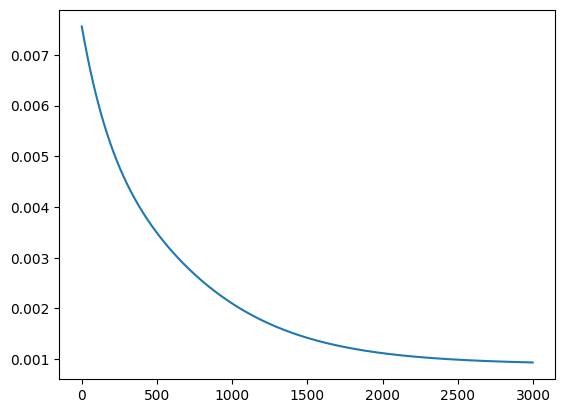

In [33]:
plt.plot(loss_array)

In [34]:
x_in = x
for m in model:
  x_in = m.forward(x_in)

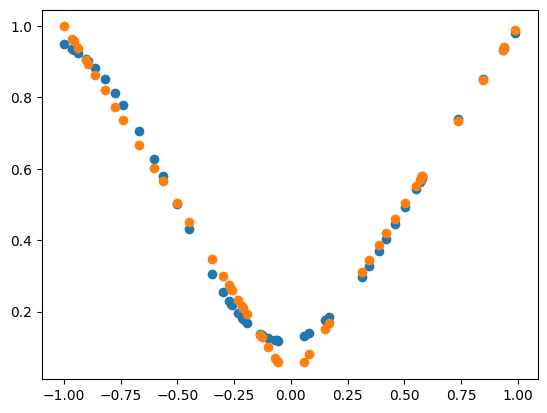

In [35]:
plt.scatter(x, x_in)
plt.scatter(x, y)

In [36]:
class MyNN():
  def __init__(self) -> None:
    self.model = [Linear(1,3), Activation(), Linear(3,1)]
    self.loss = Loss()

  def fit(self, x, y, lr=0.01, n_epoch = 1000, warm_start=True):
    self.loss_array = []
    self.lr = lr
    self.n_epoch = n_epoch
    if not warm_start:
      self.model = [Linear(1,3), Activation(), Linear(3,1)]
      self.loss = Loss()
    for epoc in range(1,self.n_epoch):
      x_in = x
      y_in = y
      #idx = np.random.randint(0,len(x_in), len(x_in))
      for m in self.model:
        x_in = m.forward(x_in)
      self.loss_array.append(self.loss.forward(x_in, y_in))
      grad = self.loss.backward()
      for i in range(len(self.model)-1, -1, -1):
        grad = self.model[i].backward(grad, lr=self.lr)

  def predict(self, x):
      x_in = x.reshape(len(x),-1)
      for m in self.model:
        x_in = m.forward(x_in)
      return np.squeeze(x_in)

In [37]:
myNN = MyNN()

In [97]:
myNN.fit(x,y,lr=0.1, n_epoch=10000)

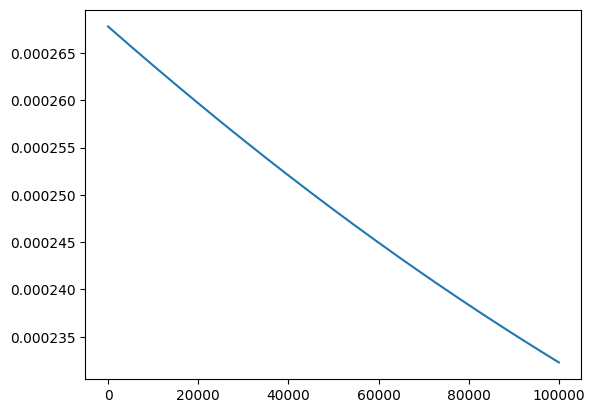

In [98]:
plt.plot(myNN.loss_array)

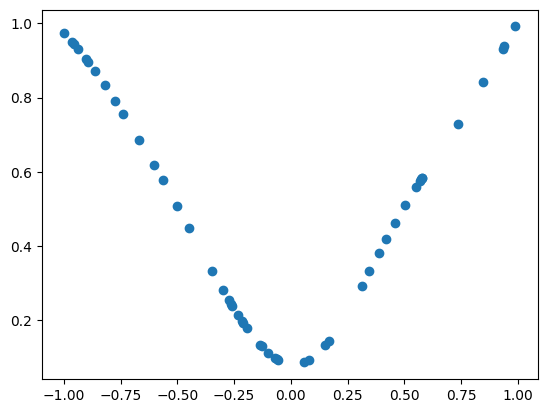

In [99]:
plt.scatter(x, myNN.predict(x))